In [1]:
# coding: utf8
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**测试数据集**

In [2]:
datasets = np.array([
    [1, 0.9],
    [1, 0.8],
    [0, 0.7],
    [1, 0.6],
    [1, 0.55],
    [1, 0.54],
    [0, 0.53],
    [0, 0.52],
    [1, 0.51],
    [0, 0.505],
    [1, 0.4],
    [0, 0.39],
    [1, 0.38],
    [0, 0.37],
    [0, 0.36],
    [0, 0.35],
    [1, 0.34],
    [0, 0.33],
    [1, 0.3],
    [0, 0.1],
])
# 根据p从高到低排序，方便后面使用
idx = np.argsort(datasets[:, 1])[::-1]
y = datasets[idx, 0]
p = datasets[idx, 1]

In [3]:
M = len(y) # 样本数
M_P = (y == 1).sum() # 正例数
M_N = (y == 0).sum() # 负例数
M, M_P, M_N

(20, 10, 10)

**获取混淆矩阵**

In [4]:
def get_confusion_matrix(y, y_hat):
    TP = ((y == 1) & (y_hat == 1)).sum()
    TN = ((y == 0) & (y_hat == 0)).sum()
    FP = ((y == 0) & (y_hat == 1)).sum()
    FN = ((y == 1) & (y_hat == 0)).sum()
    return np.array([
        [TP, FN],
        [FP, TN],
    ])
get_confusion_matrix(y, (p>0.5).astype(int))

array([[6, 4],
       [4, 6]])

**ROC曲线绘制方法**

将`p`从高到低排序，依次从排好序的`p`中取`threshold`，根据`threshold`来判断`p`是属于正例还是负例，得到`y_hat`，然后再算出`(FPR, TPR)`作为坐标

连接所有的点，得到ROC曲线，曲线在的面积即ROC_AUC

In [5]:
xs = []
ys = []
for threshold in p:
    cm = get_confusion_matrix(y, (p > threshold).astype(int))
    TPR = cm[0][0] / M_P
    FPR = cm[1][0] / M_N
    xs.append(FPR)
    ys.append(TPR)
xs = np.array(xs)
ys = np.array(ys)

Text(0.5,1,'ROC Curve')

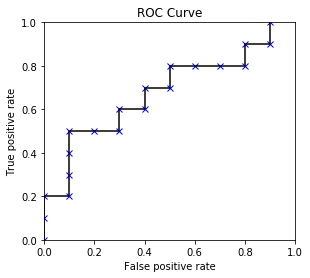

In [6]:
plt.figure(figsize=(4.5,4))
plt.plot(xs, ys, 'bx')
plt.plot(xs, ys, 'k-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

**换一个方法绘制ROC曲线**

先将`p`从高到低排序（`y`也对应的调整位置），从`(0, 0)`出发，碰到`y=1`就往上走一格，碰到`y=0`就往右走一格，得到最后的路径，将横纵坐标归一化一下

In [7]:
xs = [0]
ys = [0]
xx = 0
yy = 0
for yi in y:
    xx += int(yi==0)
    yy += int(yi==1)
    xs.append(xx)
    ys.append(yy)
xs = np.array(xs) / xx
ys = np.array(ys) / yy

Text(0.5,1,'ROC Curve')

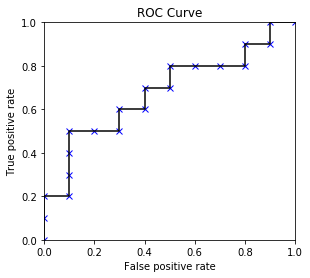

In [8]:
plt.figure(figsize=(4.5,4))
plt.plot(xs, ys, 'bx')
plt.plot(xs, ys, 'k-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

ROC实际上不是根据`p`的具体值来计算的，它只关心`p`的顺序，也就是将`p`从高到低排好序后，`y`的1都在左边，0都在右边，这时候ROC_AUC为1

它根据0出现的时候，0的右边有多少个1来进行惩罚，看到上面的例子，第一个出现的0，惩罚的面积就很大（也就是当出现第一个0时，曲线往右走，上面的这部分面积都是被惩罚掉的）；如果出现1，就往上走，不会出现惩罚面积